# Name: Sarmad Hassan

## The Sparks Foundation: Data Science and Business Analytics Internship

### Task 7: Stock Market Prediction using Numerical and Textual Analysis

**Objective**: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

### Import Libraries for stock market prediction

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Apple Stock Price Dataset

In [2]:
stock = pd.read_csv("AAPL.csv")

In [3]:
# Start
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.593426,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656428,6.604825,601904800
2,2010-01-06,7.656428,7.686786,7.526786,7.534643,6.499768,552160000
3,2010-01-07,7.562500,7.571429,7.466072,7.520714,6.487752,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.530883,447610800


In [4]:
# End
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2774,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900
2775,2021-01-12,128.500000,129.690002,126.860001,128.800003,128.800003,91951100
2776,2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800
2777,2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800
2778,2021-01-15,128.779999,130.220001,127.000000,127.139999,127.139999,111598500


### Data Analysis

In [5]:
# Data Information
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779 entries, 0 to 2778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2779 non-null   object 
 1   Open       2779 non-null   float64
 2   High       2779 non-null   float64
 3   Low        2779 non-null   float64
 4   Close      2779 non-null   float64
 5   Adj Close  2779 non-null   float64
 6   Volume     2779 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 152.1+ KB


In [6]:
# Check Null Values
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Drop Duplicates
stock = stock.drop_duplicates()

In [8]:
# Statistical Analysis
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2.779000e+03
mean,34.109573,34.464013,33.753642,34.121882,32.470302,2.850886e+08
std,25.181740,25.523210,24.831012,25.189306,25.675317,2.295124e+08
min,6.870357,7.000000,6.794643,6.858929,5.916861,2.256430e+07
25%,17.550357,17.736607,17.371429,17.505001,15.477605,1.189256e+08
50%,27.057501,27.250000,26.795000,27.045000,25.029079,2.016624e+08
75%,43.122500,43.515000,42.787498,43.117501,41.757523,3.882728e+08
max,138.050003,138.789993,134.339996,136.690002,136.690002,1.880998e+09


In [9]:
# coverting the datatype of column 'Date' from type object to type 'datetime'
stock["Date"] = pd.to_datetime(stock["Date"]).dt.normalize()
stock["Date"].dtypes

dtype('<M8[ns]')

In [10]:
# setting column 'Date' as the index column
stock.set_index('Date', inplace= True)

In [11]:
# Sorting the data according to index
stock = stock.sort_index(ascending = True, axis = 0)
stock.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-06-24,14.550000,14.595000,14.216071,14.376429,12.668187,480746000
2011-03-15,12.217857,12.422857,12.146428,12.336785,10.642338,721081200
2011-09-27,14.597500,14.616072,14.216429,14.259286,12.300785,632497600
2020-10-02,112.889999,115.370003,112.220001,113.019997,112.825348,144712000
2011-02-08,12.631429,12.697143,12.576786,12.685715,10.943342,381040800


### Stock Data Insights

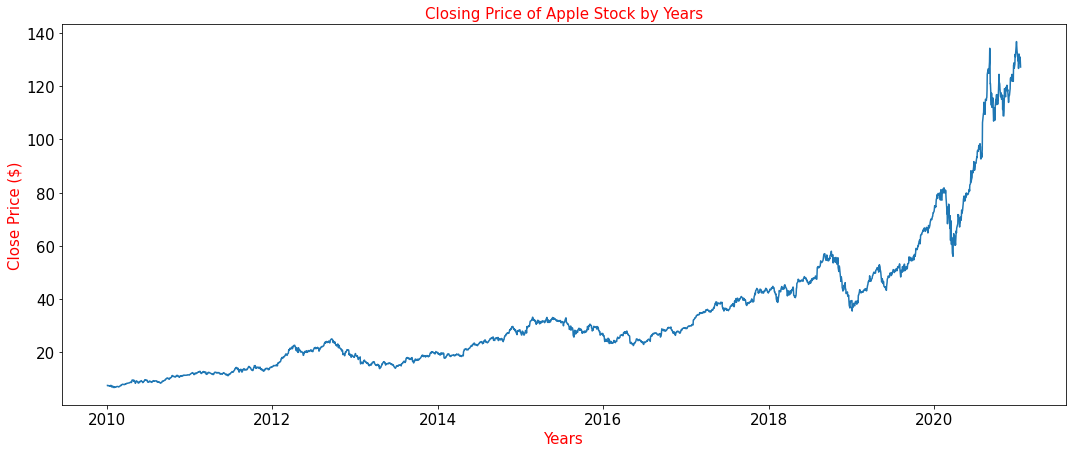

In [12]:
# Closing Price Graph
plt.figure(figsize = (18, 7))
sns.lineplot(x = "Date", y = "Close", data = stock, palette = "prism")
plt.title("Closing Price of Apple Stock by Years", size = 15, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Years", size = 15, color = "red")
plt.ylabel("Close Price ($)", size = 15, color = "red")
plt.show()

In [13]:
# calculating 10 days rolling mean
stock.rolling(10).mean().sample(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-09,37.828000,38.504501,37.297500,38.191249,37.303762,2.067423e+08
2013-07-16,15.023750,15.205036,14.911071,15.093857,13.300370,2.981258e+08
2014-12-01,29.200250,29.485250,28.827250,29.153500,26.557391,1.996410e+08
2017-05-26,38.516750,38.671000,38.211750,38.390750,36.667654,1.042326e+08
2010-02-05,7.121893,7.227071,6.974179,7.091322,6.117335,1.074634e+09
2014-10-02,25.130250,25.365750,24.871000,25.124250,22.788130,2.456027e+08
2012-06-27,20.617571,20.773928,20.477000,20.648786,17.812694,3.236327e+08
2011-06-09,12.140429,12.219750,12.042179,12.103928,10.441465,3.651169e+08
2018-03-13,44.374500,44.788750,43.999751,44.411500,42.912083,1.315166e+08


**Plotting the Close Price and a 30-day Rolling Mean & Standard Deviation of Close Price**

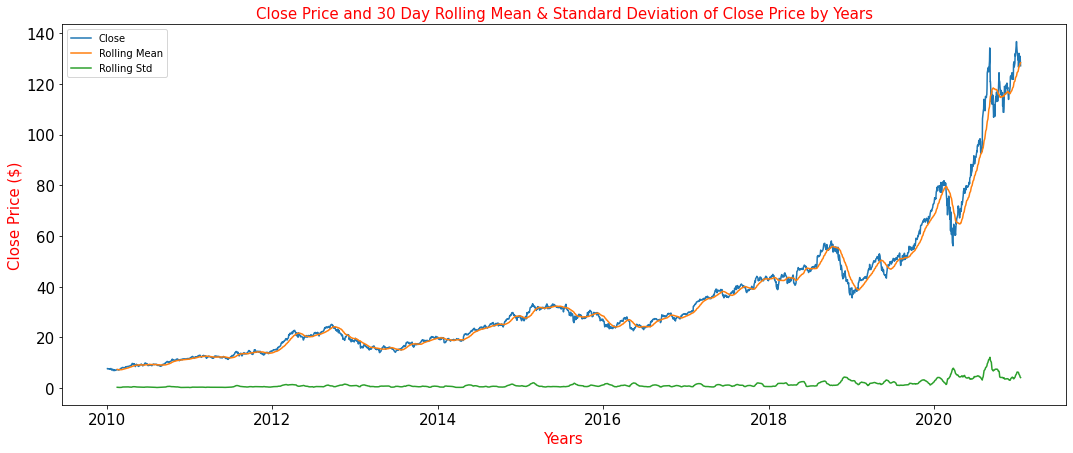

In [14]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = "Date", y = "Close", data = stock, label = "Close")
rolling_mean = stock.rolling(window=30).mean()['Close']
sns.lineplot(x = "Date", y = rolling_mean, data = stock, label = "Rolling Mean")
rolling_std = stock.rolling(window=30).std()["Close"]
sns.lineplot(x = "Date", y = rolling_std, data = stock, label = "Rolling Std")
plt.title("Close Price and 30 Day Rolling Mean & Standard Deviation of Close Price by Years", size = 15, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Years", size = 15, color = "red")
plt.ylabel("Close Price ($)", size = 15, color = "red")
plt.show()

Text(0.5, 1.0, 'Returns')

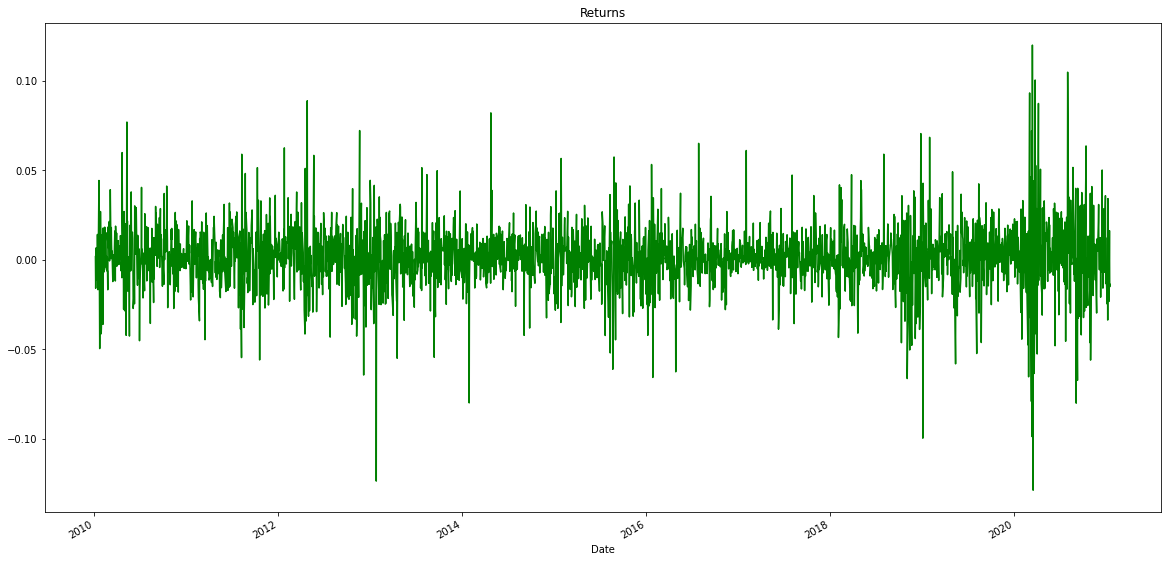

In [15]:
#Plotting returns
returns = stock["Close"] / stock["Close"].shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

### Modeling

In [16]:
X = stock[["Open", "High", "Low", "Close"]]
y = stock["Adj Close"]

Since we are using LSTM to predict stock prices, which is a time series data, it is important to understand that LSTM can be very sensitive to the scale of the data. Right now, if the data is observed, it is present in different scales. Therefore, it is important to re-scale the data so that the range of the dataset is same, for almost all records. Here a feature range of (-1,1) is used.

### Dividing the Dataset into Training and Test

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

### Predictions

In [18]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
predictions[:6]

array([ 34.85516027,  45.59385581, 118.5412206 ,  55.08210273,
        23.59113503,  10.79904451])

In [19]:
pd.DataFrame({"Actual": y_test, "Predicted": predictions}).tail()

,Actual,Predicted
Date,,
2012-12-27,16.009375,16.449034
2013-01-09,16.072786,16.531758
2019-10-30,60.113815,59.619044
2017-08-22,38.301964,38.398760
2017-11-09,42.161411,42.476672


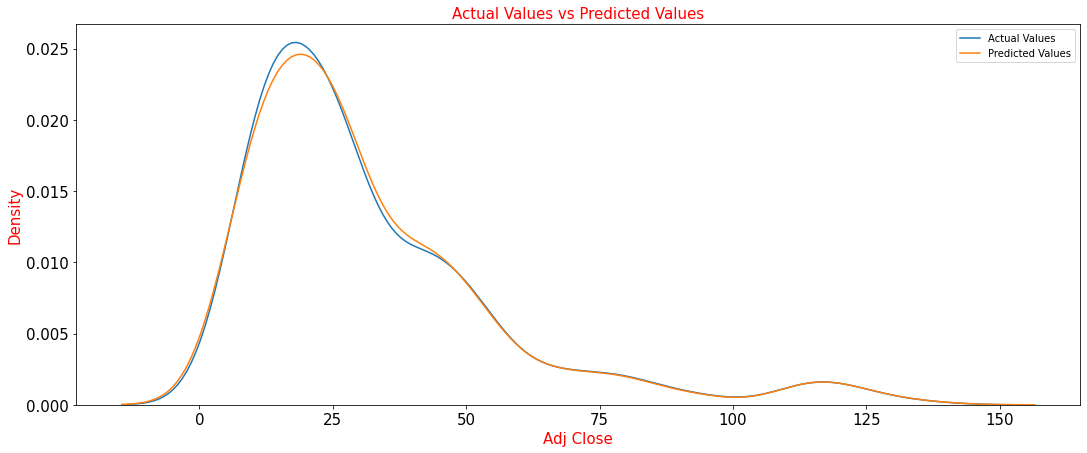

In [20]:
# Actual and Predicted Values Plot
plt.figure(figsize = (18, 7))
sns.kdeplot(data = x_test, x = y_test, label = "Actual Values")
sns.kdeplot(data = x_test, x = predictions, label = "Predicted Values")
plt.legend()
plt.title("Actual Values vs Predicted Values", size = 15, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Adj Close", size = 15, color = "red")
plt.ylabel("Density", size = 15, color = "red")
plt.show()
plt.show()

### Model Evaluation

In [21]:
# Mean Squared Error
mse = metrics.mean_squared_error(y_test, predictions)
mse

0.2815868529753441

### Import Libraries for News Analysis

In [22]:
! pip install vaderSentiment

In [23]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Import Dataset

In [24]:
news = pd.read_csv("news.csv")
news.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


### Data Preparation and Analysis

In [25]:
# Drop headline_category column
news = news.drop(columns = "headline_category")
news.head()

,publish_date,headline_text
0,20010101,win over cena satisfying but defeating underta...
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa


In [26]:
# Correct Date Values
news["publish_date"] = pd.to_datetime(news["publish_date"], format = "%Y%m%d")
news.head()

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


In [27]:
# Rename Columns
news.columns = ["Date", "News"]

In [28]:
# Check for common information of the first datast
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   News    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 50.3+ MB


In [29]:
# Group the headlines for each day
news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news = news.drop_duplicates() 
news.reset_index(inplace=True,drop=True)

In [30]:
news.head()

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...


In [31]:
# Check Null Values
news.isnull().sum()

Date    0
News    0
dtype: int64

In [32]:
# Check Shape
news.shape

(7080, 2)

### News Analytics

In [33]:
# Remove unwanted characters from News
news.replace("[^a-zA-Z]", " ", regex = True, inplace = True)
news["News"].head(5)

0    win over cena satisfying but defeating underta...
1    Status quo will not be disturbed at Ayodhya  s...
2    Powerless north India gropes in the dark Think...
3    The string that pulled Stephen Hawking to Indi...
4    Light combat craft takes India into club class...
Name: News, dtype: object

In [34]:
# Textual Analysis
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [35]:
# Adding subjectivity and polarity columns
news["Subjectivity"] = news["News"].apply(getSubjectivity)
news["Polarity"] = news["News"].apply(getPolarity)
news.head()

,Date,News,Subjectivity,Polarity
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
2,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
4,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024


In [36]:
# Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

In [ ]:
news["Compound"] = news["News"].apply(lambda x: sia.polarity_scores(x)["compound"])
news['Negative'] = news["News"].apply(lambda x: sia.polarity_scores(x)["neg"])
news['Neutral'] = news["News"].apply(lambda x: sia.polarity_scores(x)['neu'])
news['Positive'] = news["News"].apply(lambda x: sia.polarity_scores(x)['pos'])
news.head()